In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import typing as t
from pathlib import Path
from tqdm.notebook import tqdm
from transformers.models.auto.tokenization_auto import AutoTokenizer

In [131]:
tqdm.pandas()

In [3]:
DATA_DIR = Path('/home/jovyan/jigsaw-toxic/data')
DATASETS_DIR = DATA_DIR / 'datasets'
OLD_DATASET_DIR = DATA_DIR / 'jigsaw-toxic-20211212'
DATASET_DIR = DATASETS_DIR / 'offenseval-2020'

In [5]:
!mkdir -p $DATASET_DIR
!cp $OLD_DATASET_DIR/valid.csv $DATASET_DIR/valid.csv
!cp $OLD_DATASET_DIR/offenseval_2020_bounded_train.csv $DATASET_DIR/train_precise.csv
!cp $OLD_DATASET_DIR/offenseval_2020_full_bounded_train.csv $DATASET_DIR/train_full.csv

In [132]:
train_precise_df = pd.read_csv(DATASET_DIR / 'train_precise.csv')
train_full_df = pd.read_csv(DATASET_DIR / 'train_full.csv')
valid_df = pd.read_csv(DATASET_DIR / 'valid.csv')

In [129]:
train_precise_df

,id,text,average,std,score_lower,score_upper
0,1159533705125343232,You wanna leave? then feel free cus I promise ...,0.664921,0.097098,0.567823,0.762019
1,1159533738973257728,@USER @USER His addiction was so bad that all ...,0.503967,0.071867,0.432100,0.575834
2,1159533771873488897,@USER He has the body language of a common str...,0.443756,0.059675,0.384081,0.503431
3,1159533777347104769,"@USER Mommy, why is that guy next to us has hi...",0.568449,0.095838,0.472611,0.664287
4,1159533784544550912,Boy flaunting his money on Instagram but could...,0.419205,0.092022,0.327183,0.511227
...,...,...,...,...,...,...
386252,1187636060827852800,@USER This is how all of Trump's sycophants sh...,0.536016,0.068163,0.467852,0.604179
386253,1187636271818125313,@USER Bro I played a map with a cave that was ...,0.371413,0.092340,0.279074,0.463753
386254,1187425324440707076,I grew up seeing my mom doing the impossible f...,0.545863,0.034873,0.510990,0.580736
386255,1187628780594049025,@USER Show his face around the internet. We sh...,0.410000,0.096503,0.313497,0.506503


In [142]:
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

In [144]:
tokenizer('The worlds at war and everyone is suffering 😭💔', add_special_tokens=True,
            truncation=True,
            padding='max_length',
            max_length=256)

{'input_ids': [0, 133, 14490, 23, 997, 8, 961, 16, 3606, 17841, 12410, 6569, 10659, 10674, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [151]:
def _generate_text_token_len(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['text_token_len'] = df['text'].progress_apply(
        lambda text: len([
            i for i in tokenizer(text, add_special_tokens=True,
                truncation=True,
                padding='max_length',
                max_length=256)['input_ids']
            if i != 1
        ]))
    return df

In [152]:
train_precise_df = _generate_text_token_len(train_precise_df)

  0%|          | 0/386257 [00:00<?, ?it/s]

In [153]:
len(train_precise_df[train_precise_df['text_token_len'] < 128]) / len(train_precise_df)

0.9997954729623023

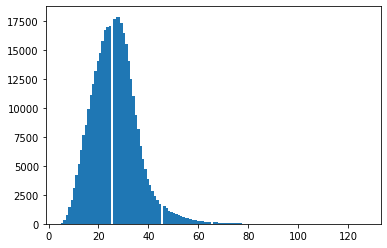

In [154]:
plt.hist(train_precise_df[train_precise_df['text_token_len'] < 128]['text_token_len'], bins=128);

In [28]:
def _preview_sample(df: pd.DataFrame, idx: t.Optional[int] = None):
    idx = idx if idx is not None else random.randint(0, len(df) - 1)
    row = df.iloc[idx]
    print(f'Index: {idx}')
    print(f'Score: {row["average"]}')
    print(f'Text:\n{row["text"]}')

In [125]:
_preview_sample(train_precise_df)

Index: 119412
Score: 0.3657306083329045
Text:
The worlds at war and everyone is suffering 😭💔


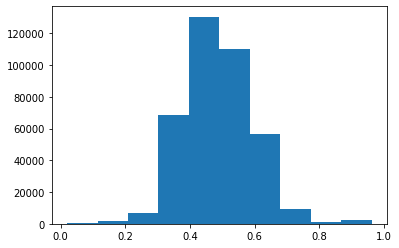

In [126]:
plt.hist(train_precise_df['average']);

In [8]:
train_full_df

,id,text,average,std,score_lower,score_upper
0,1159533701283352576,"First time I heard his name in camp, he seems ...",0.195773,0.187379,0.008394,0.383152
1,1159533703522992128,When I go to drink with Tsubaki he would alway...,0.262401,0.145998,0.116403,0.408399
2,1159533703758061570,@USER His ass need to stay up 😂😂,0.833391,0.140628,0.692764,0.974019
3,1159533703904800769,most important tweet of the day : Fuck Donald ...,0.565238,0.187498,0.377740,0.752736
4,1159533705125343232,You wanna leave? then feel free cus I promise ...,0.664921,0.097098,0.567823,0.762019
...,...,...,...,...,...,...
9075413,1187517463640137728,Why everyone should vote for MAMAMOO as The Be...,0.174259,0.205074,-0.030815,0.379333
9075414,1187636341338710016,@USER Yes but Boris is a puppet for the ERG an...,0.487383,0.067990,0.419393,0.555373
9075415,1187636341560889344,@USER Did you check or just messaing without s...,0.241537,0.176056,0.065481,0.417593
9075416,1187636341661679617,I’ll never forget the day I dropped my casava ...,0.251834,0.170168,0.081665,0.422002


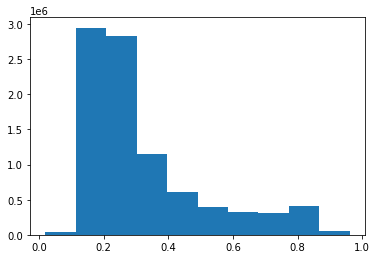

In [6]:
plt.hist(train_full_df['average']);

In [9]:
valid_df

,less_toxic,more_toxic,certainty
0,"I think people say its not so absurd, because ...",Re Vandalism. . . . that is because the user ...,0.666667
1,You must have the lowest IQ of anyone on wikip...,Wha's a reliable source mike? Something that c...,1.000000
2,"Thanks for removing more of his anonymous, un...","To Bad\nyou dont have the balls to sign in, I ...",1.000000
3,"""\n\nActually, it clearly does not involve pow...",", 18 November 2006 (UTC)\n\nWell comrade. Look...",0.666667
4,You are not cool \n\nYou are the most hated f...,"""== Hey Fuck-head==\nHey, just wanted to say ""...",1.000000
...,...,...,...
10103,Heeeeeeeeeeeeeeyyyyyyyyyyyy dude! Sup!,you deleted my page \nand i am extrememly mad ...,1.000000
10104,ATTENTION:''''''\n\nANYONE WHO OPPOSES MY OPIN...,suck dick u disrespectful swearing wank!!,1.000000
10105,"Oh yah, and Bayerischermann is another guy try...",Thanks. Also thanks for freezing the article. ...,1.000000
10106,I had to chop out a section specifically compa...,"""\n\nHorrifyingly enough, """"ritualistic penis ...",0.666667
